# Imbalanced-Learn

## Distribusi Awal Species

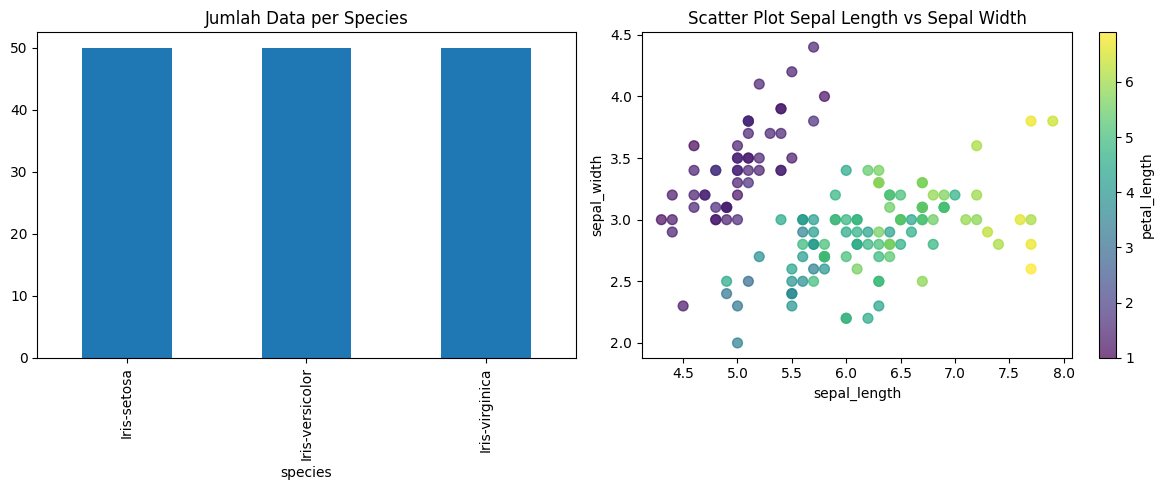

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Bar chart jumlah species
df['species'].value_counts().plot(
    kind='bar',
    ax=axes[0],
    title='Jumlah Data per Species'
)

# Plot 2: Scatter plot sepal_length vs sepal_width
df.plot.scatter(
    x='sepal_length',
    y='sepal_width',
    c='petal_length',
    cmap='viridis',
    s=50,
    alpha=0.7,
    title='Scatter Plot Sepal Length vs Sepal Width',
    ax=axes[1]
)

plt.tight_layout()
plt.show()

## Imbalanced Data Species Iris-setosa

(115, 6)

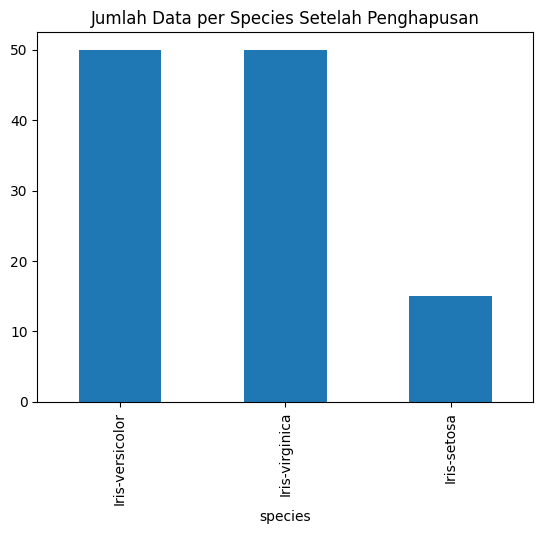

In [ ]:
# Cari baris dengan species = "Iris-setosa"
setosa_idx = df[df["species"] == "Iris-setosa"].index

# Ambil 35 baris pertama
to_drop = setosa_idx[:35]

df['species'].value_counts().plot(kind='bar', title='Jumlah Data per Species Setelah Penghapusan')
df.shape


### Visualisasi PCA dan LDA dari dataset Imbalanced (15 50 50)

explained variance ratio (first two components): [9.99274095e-01 5.67206442e-04]


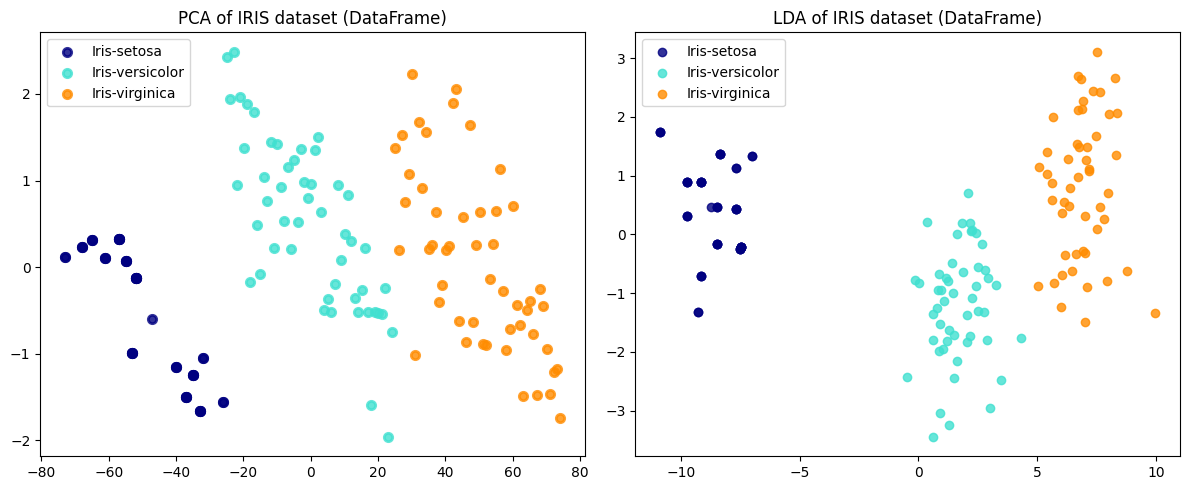

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Ambil fitur numerik
X = df.drop(columns=["species"]).values

# Encode species ke bentuk angka
le = LabelEncoder()
y = le.fit_transform(df["species"])

# Nama target
target_names = le.classes_

# PCA & LDA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Variance explained oleh PCA
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# --- Plot PCA & LDA berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom

colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plot PCA di kiri
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[0].scatter(
        X_r[y == i, 0], X_r[y == i, 1],
        color=color, alpha=0.8, lw=lw, label=target_name
    )
axes[0].legend(loc="best", shadow=False, scatterpoints=1)
axes[0].set_title("PCA of IRIS dataset (DataFrame)")

# Plot LDA di kanan
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[1].scatter(
        X_r2[y == i, 0], X_r2[y == i, 1],
        alpha=0.8, color=color, label=target_name
    )
axes[1].legend(loc="best", shadow=False, scatterpoints=1)
axes[1].set_title("LDA of IRIS dataset (DataFrame)")

plt.tight_layout()
plt.show()


### Klasifikasi dengan Imbalanced Data (15 50 50)

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        35
      macro avg       1.00      1.00      1.00        35
   weighted avg       1.00      1.00      1.00        35



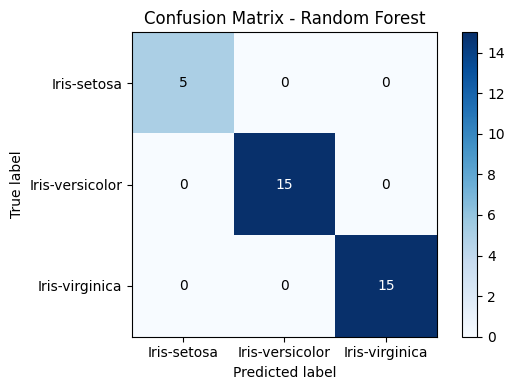

In [ ]:
# =========================
# Klasifikasi Iris Dataset
# =========================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Split data (X, y sudah didefinisikan di cell sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Buat model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
 
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix manual dengan matplotlib
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

# Tambahkan colorbar
plt.colorbar(im)

# Label axis
ax.set(
    xticks=np.arange(len(target_names)),
    yticks=np.arange(len(target_names)),
    xticklabels=target_names,
    yticklabels=target_names,
    ylabel="True label",
    xlabel="Predicted label",
    title="Confusion Matrix - Random Forest"
)

# Tampilkan angka di setiap kotak
for i in range(len(target_names)):
    for j in range(len(target_names)):
        ax.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.tight_layout()
plt.show()


## ADASYN

### Melakukan generate data dengan ADASYN

Jumlah data Iris-setosa sebelum: 15
Jumlah data Iris-setosa sesudah: 50


<Axes: title={'center': 'Jumlah Data per Species Setelah Generate'}, xlabel='species'>

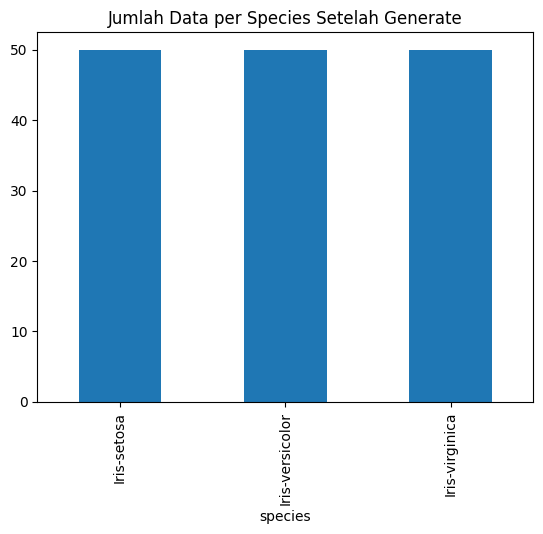

In [ ]:
import pandas as pd


# Hitung jumlah Iris-setosa
count_setosa = df[df["species"] == "Iris-setosa"].shape[0]
print("Jumlah data Iris-setosa sebelum:", count_setosa)

# Target jumlah data
target = 50

if count_setosa < target:
    # Ambil data 'Iris-setosa' sebagai sumber
    setosa_data = df[df["species"] == "Iris-setosa"]
    
    # Tentukan berapa data tambahan
    need = target - count_setosa
    
    # Generate data tambahan dengan sampling (boleh duplikat karena replace=True)
    new_data = setosa_data.sample(n=need, replace=True, random_state=42)
    
    # Gabungkan ke DataFrame asli
    df_extended = pd.concat([df, new_data], ignore_index=True)
    
    print("Jumlah data Iris-setosa sesudah:", df_extended[df_extended["species"] == "Iris-setosa"].shape[0])
else:
    df_extended = df.copy()
    print("Jumlah sudah >= 50, tidak perlu ditambah.")

# Simpan hasil jika perlu
# df_extended.to_csv("iris_extended.csv", index=False)
df = df_extended.copy()
df_extended['species'].value_counts().plot(kind='bar', title='Jumlah Data per Species Setelah Generate')


### Visualisasi PCA dan LDA dari dataset generate

explained variance ratio (first two components): [9.99274095e-01 5.67206442e-04]


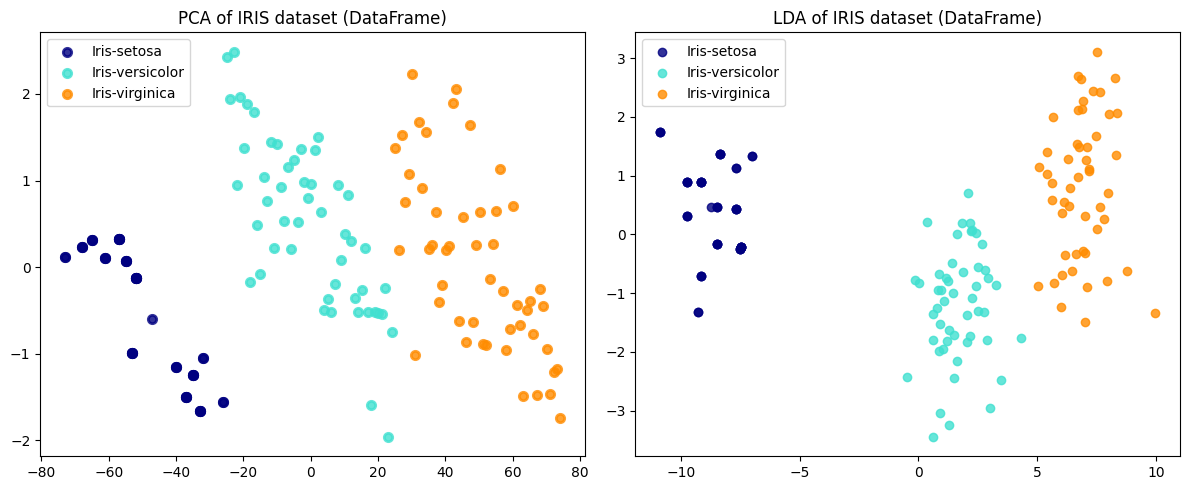

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Ambil fitur numerik
X = df.drop(columns=["species"]).values

# Encode species ke bentuk angka
le = LabelEncoder()
y = le.fit_transform(df["species"])

# Nama target
target_names = le.classes_

# PCA & LDA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Variance explained oleh PCA
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# --- Plot PCA & LDA berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom

colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plot PCA di kiri
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[0].scatter(
        X_r[y == i, 0], X_r[y == i, 1],
        color=color, alpha=0.8, lw=lw, label=target_name
    )
axes[0].legend(loc="best", shadow=False, scatterpoints=1)
axes[0].set_title("PCA of IRIS dataset (DataFrame)")

# Plot LDA di kanan
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    axes[1].scatter(
        X_r2[y == i, 0], X_r2[y == i, 1],
        alpha=0.8, color=color, label=target_name
    )
axes[1].legend(loc="best", shadow=False, scatterpoints=1)
axes[1].set_title("LDA of IRIS dataset (DataFrame)")

plt.tight_layout()
plt.show()


### Hasil Klasifikasi setelah ADASYN

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



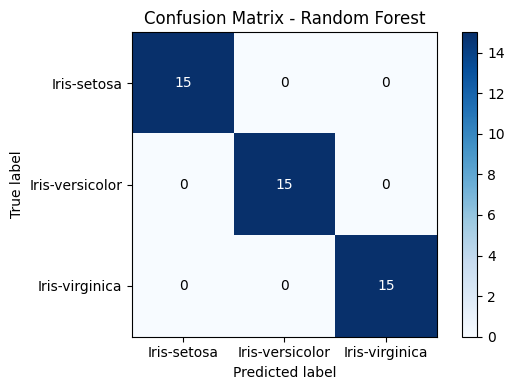

In [ ]:
# =================================
# Klasifikasi Iris Dataset (Setelah Penanganan Imbalance)
# =================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Split data (X, y sudah didefinisikan di cell sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Buat model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix manual dengan matplotlib
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

# Tambahkan colorbar
plt.colorbar(im)

# Label axis
ax.set(
    xticks=np.arange(len(target_names)),
    yticks=np.arange(len(target_names)),
    xticklabels=target_names,
    yticklabels=target_names,
    ylabel="True label",
    xlabel="Predicted label",
    title="Confusion Matrix - Random Forest"
)

# Tampilkan angka di setiap kotak
for i in range(len(target_names)):
    for j in range(len(target_names)):
        ax.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.tight_layout()
plt.show()
